<a href="https://colab.research.google.com/github/vanstevanzaky/PEMB_MESIN_LEARING_TI_25-26/blob/main/Week14_convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JS14 - CONVOLUTIONAL NEURAL NETWORK**

CNN adalah jaringan syaraf tiruan untuk data visual yang mampu mengenali pola otomatis melalui konvolusi, dari fitur sederhana hingga objek kompleks. Modul ini mengajarkan dasar klasifikasi citra dengan menyiapkan dataset, melakukan augmentation, membangun dan melatih CNN, serta mengevaluasi hasilnya. Pemahaman ini menjadi fondasi sebelum mempelajari arsitektur lanjutan seperti VGG, ResNet, atau MobileNet yang banyak dipakai pada aplikasi modern seperti deteksi objek dan pengenalan wajah.

## **Rangkuman Materi CNN pada Modul Praktikum JS14 - Convolutional Neural Network**

### Pengertian CNN
- CNN adalah **jenis khusus Artificial Neural Network (ANN)** yang dirancang untuk data berbentuk grid (misalnya gambar 2D atau time series 1D).  
- CNN mampu melakukan **multi-level abstraction**, yaitu mempelajari fitur dari tingkat rendah (edge, tekstur) hingga tingkat tinggi (objek).  
- Pertama kali diperkenalkan secara utuh oleh **Yann LeCun**, dan menjadi populer di bidang **computer vision**.

---

### Fungsi & Pemanfaatan
- Paling banyak digunakan untuk **klasifikasi citra**.  
- Keunggulan CNN:
  - **Weight sharing** → mengurangi jumlah parameter, mencegah overfitting.  
  - **Ekstraksi fitur otomatis** sebelum klasifikasi.  
  - Lebih efisien dibanding ANN biasa untuk data visual.  
- Kini juga dipakai di **Natural Language Processing (NLP)** dan **speech recognition**.

---

### Anatomi CNN
CNN terdiri dari dua blok utama:

1. **Convolutional Block**
   - **Convolutional Layer**: menggunakan kernel/filter untuk ekstraksi fitur.  
   - **Pooling Layer**: menyaring nilai penting (max pooling, average pooling, dll).  
   - **Padding**: menambahkan nilai di tepi agar ukuran output sesuai input.  
   - **Striding**: menentukan langkah pergeseran kernel.  
   - **Activation Function (ReLU)**: mempertahankan nilai positif, mengabaikan negatif.  

2. **Fully Connected Block**
   - Hasil dari convolutional block di-*flatten* menjadi array 1D.  
   - Diteruskan ke **ANN layer** untuk klasifikasi akhir.

---

### Konsep Penting
- **Kernel/Filter**: grid nilai untuk mendeteksi fitur (edge detection, sharpen, dll).  
- **Operasi Konvolusi**: sliding window yang mengalikan kernel dengan data.  
- **Pooling**: mereduksi dimensi sambil mempertahankan fitur penting.  
- **Flattening**: mengubah hasil konvolusi & pooling ke bentuk 1D.  

---

### Proses Pembelajaran
- CNN belajar menggunakan **backpropagation** dan **loss function**.  
- Bedanya dengan ANN: CNN memperbarui **nilai kernel/filter** pada convolutional layer, bukan hanya bobot antar neuron.  

---

### Kesimpulan
- CNN = **Convolutional Block + Fully Connected Block**.  
- Arsitektur ini memungkinkan ekstraksi fitur otomatis dan klasifikasi yang efisien.  
- CNN adalah fondasi utama dalam **computer vision modern** dan berkembang ke berbagai domain lain.


## **Praktikum 1**

### Langkah 1 - Import Library

**Proses:** Kode di bawah ini mengimpor library TensorFlow dan ImageDataGenerator untuk mempersiapkan framework deep learning dan tools augmentasi data citra.

In [1]:
# Uninstall semua package yang konflik dengan TensorFlow 2.16.1
!pip uninstall -y jax jaxlib tensorflow-decision-forests tf-keras tensorflow-text tensorstore ydf

# Restart session setelah ini

Found existing installation: jax 0.7.2
Uninstalling jax-0.7.2:
  Successfully uninstalled jax-0.7.2
Found existing installation: jaxlib 0.7.2
Uninstalling jaxlib-0.7.2:
  Successfully uninstalled jaxlib-0.7.2
Found existing installation: tensorflow_decision_forests 1.12.0
Uninstalling tensorflow_decision_forests-1.12.0:
  Successfully uninstalled tensorflow_decision_forests-1.12.0
Found existing installation: tf_keras 2.19.0
Uninstalling tf_keras-2.19.0:
  Successfully uninstalled tf_keras-2.19.0
Found existing installation: tensorflow-text 2.19.0
Uninstalling tensorflow-text-2.19.0:
  Successfully uninstalled tensorflow-text-2.19.0
Found existing installation: tensorstore 0.1.79
Uninstalling tensorstore-0.1.79:
  Successfully uninstalled tensorstore-0.1.79
Found existing installation: ydf 0.13.0
Uninstalling ydf-0.13.0:
  Successfully uninstalled ydf-0.13.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Penjelasan Kode:**
- `tensorflow` adalah library utama untuk membuat dan melatih model deep learning
- `ImageDataGenerator` digunakan untuk melakukan augmentasi data gambar secara otomatis

**Analisa Output:** Tidak ada output visual, library berhasil diimport dan siap digunakan.

### Langkah 2 - Pra Pengolahan

#### Langkah 2.1 - Pra Pengolahan Data

**Proses:** Kode di bawah ini melakukan augmentasi dan preprocessing data training untuk meningkatkan variasi dataset dan mencegah overfitting.

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Praktikum Machine Learning/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


**Penjelasan Kode:**
- `rescale=1./255` menormalisasi nilai pixel dari 0-255 menjadi 0-1
- `shear_range=0.2` melakukan transformasi geser untuk variasi sudut
- `zoom_range=0.2` melakukan zoom in/out random
- `horizontal_flip=True` membalik gambar secara horizontal
- `flow_from_directory` membaca gambar dari folder dengan target size 64x64 pixel, batch 32, dan mode binary (2 kelas)

**Analisa Output:** Output menampilkan jumlah gambar yang ditemukan dan jumlah kelas (contoh: "Found 8000 images belonging to 2 classes").

#### Langkah 2.2. Pra Pengolahan Data Testing

**Proses:** Kode di bawah ini melakukan preprocessing data testing dengan hanya normalisasi tanpa augmentasi.

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Praktikum Machine Learning/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


**Penjelasan Kode:**
- Hanya menggunakan `rescale=1./255` untuk normalisasi pixel
- Tidak ada augmentasi karena data testing harus tetap original untuk evaluasi yang objektif
- Parameter lainnya sama dengan training set (target size 64x64, batch 32, binary class)

**Analisa Output:** Output menampilkan jumlah gambar testing yang ditemukan (contoh: "Found 2000 images belonging to 2 classes").

### Langkah 3 - Pembuatan Model CNN

#### Langkah 3.1.  - Inisiasi Model CNN

**Proses:** Kode di bawah ini melakukan inisialisasi model CNN dengan arsitektur Sequential untuk membangun layer secara berurutan.

In [6]:
cnn = tf.keras.models.Sequential()

**Penjelasan Kode:**
- `Sequential()` membuat model linear dimana setiap layer memiliki satu input dan satu output
- Model masih kosong dan akan ditambahkan layer-layer selanjutnya

**Analisa Output:** Tidak ada output, model CNN berhasil diinisialisasi sebagai objek kosong.

#### Langkah 3.2. - Pembuatan Layer Konvolusi 1

**Proses:** Kode di bawah ini menambahkan layer konvolusi pertama untuk ekstraksi fitur dasar dari gambar input.

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Penjelasan Kode:**
- `filters=32` membuat 32 feature map untuk mendeteksi berbagai fitur
- `kernel_size=3` menggunakan filter 3x3 pixel untuk konvolusi
- `activation='relu'` menggunakan fungsi aktivasi ReLU untuk non-linearitas
- `input_shape=[64, 64, 3]` menentukan ukuran input: 64x64 pixel dengan 3 channel (RGB)

**Analisa Output:** Tidak ada output, layer konvolusi pertama berhasil ditambahkan ke model.

#### Langkah 3.3 - Pembuatan Layer Pooling 1

**Proses:** Kode di bawah ini menambahkan layer pooling pertama untuk mengurangi dimensi dan mengambil fitur penting.

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Penjelasan Kode:**
- `MaxPool2D` mengambil nilai maksimum dari setiap region untuk down-sampling
- `pool_size=2` menggunakan window 2x2 pixel
- `strides=2` menggeser window sebanyak 2 pixel, mengurangi dimensi menjadi setengahnya

**Analisa Output:** Tidak ada output, layer pooling berhasil ditambahkan yang akan mengurangi spatial dimension.

#### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

**Proses:** Kode di bawah ini menambahkan layer konvolusi dan pooling kedua untuk ekstraksi fitur yang lebih kompleks.

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Penjelasan Kode:**
- Layer konvolusi kedua dengan 32 filters dan kernel 3x3
- Layer pooling kedua dengan pool_size 2x2 dan strides 2
- Kombinasi ini membuat model belajar fitur hierarkis dari sederhana ke kompleks

**Analisa Output:** Tidak ada output, dua layer berhasil ditambahkan untuk memperdalam arsitektur CNN.

#### Langkah 3.5 - Flattening

**Proses:** Kode di bawah ini melakukan flattening untuk mengubah output konvolusi 2D menjadi array 1D.

In [10]:
cnn.add(tf.keras.layers.Flatten())

**Penjelasan Kode:**
- `Flatten()` mengubah feature map multi-dimensi menjadi vector 1D
- Diperlukan untuk menghubungkan convolutional layer dengan fully connected layer
- Tidak ada parameter yang perlu diatur

**Analisa Output:** Tidak ada output, layer flatten berhasil ditambahkan sebagai jembatan antara CNN dan ANN.

#### Langkah 3.6 - Fully Connected Layer 1 (Input)

**Proses:** Kode di bawah ini menambahkan fully connected layer (hidden layer) untuk pembelajaran pola kompleks.

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Penjelasan Kode:**
- `Dense(units=128)` membuat layer dengan 128 neuron
- `activation='relu'` menggunakan ReLU untuk menangkap non-linearitas
- Layer ini berfungsi sebagai hidden layer untuk klasifikasi

**Analisa Output:** Tidak ada output, fully connected layer dengan 128 neuron berhasil ditambahkan.

#### Langkah 3.7 - Fully Connected Layer 2 (Output)

**Proses:** Kode di bawah ini menambahkan output layer untuk klasifikasi binary (cat atau dog).

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Penjelasan Kode:**
- `Dense(units=1)` membuat layer output dengan 1 neuron (binary classification)
- `activation='sigmoid'` menghasilkan probabilitas antara 0-1
- Output 0 = cat, output 1 = dog (atau sebaliknya tergantung class_indices)

**Analisa Output:** Tidak ada output, output layer berhasil ditambahkan untuk prediksi binary.

#### Langkah 3.8 - Compile Model CNN

**Proses:** Kode di bawah ini melakukan kompilasi model dengan menentukan optimizer, loss function, dan metrics.

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Penjelasan Kode:**
- `optimizer='adam'` menggunakan algoritma Adam untuk update bobot (adaptive learning rate)
- `loss='binary_crossentropy'` fungsi loss untuk klasifikasi binary
- `metrics=['accuracy']` menampilkan akurasi sebagai metrik evaluasi

**Analisa Output:** Tidak ada output, model berhasil dikompilasi dan siap untuk training.

### Langkah 4 - Fit CNN

**Proses:** Kode di bawah ini melatih model CNN dengan data training dan validasi selama 25 epoch.

In [14]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1508s 6s/step - accuracy: 0.5412 - loss: 0.7102 - val_accuracy: 0.6715 - val_loss: 0.6131
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 101s 403ms/step - accuracy: 0.6717 - loss: 0.6111 - val_accuracy: 0.7230 - val_loss: 0.5504
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 99s 397ms/step - accuracy: 0.6990 - loss: 0.5598 - val_accuracy: 0.6830 - val_loss: 0.5922
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 99s 398ms/step - accuracy: 0.7542 - loss: 0.5162 - val_accuracy: 0.7350 - val_loss: 0.5167
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 102s 408ms/step - accuracy: 0.7286 - loss: 0.5309 - val_accuracy: 0.7495 - val_loss: 0.5195
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 99s 394ms/step - accuracy: 0.7465 - loss: 0.5077 - val_accuracy: 0.7755 - val_loss: 0.4710
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 98s 394ms/step - accuracy: 0.7665 - loss: 0.4829 - val_accuracy: 0.7620 - val_loss: 0.4852
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 401ms/step - accuracy: 0.7835 - loss:

**Penjelasan Kode:**
- `x=training_set` menggunakan data training yang sudah di-augmentasi
- `validation_data=test_set` menggunakan data testing untuk validasi setiap epoch
- `epochs=25` melatih model sebanyak 25 iterasi penuh

**Analisa Output:** Output menampilkan progress training per epoch dengan nilai loss, accuracy (training), val_loss, dan val_accuracy (validation). Idealnya accuracy meningkat dan loss menurun seiring epoch.

### Langkah 5 - Prediksi dengan 1 Citra

**Proses:** Kode di bawah ini melakukan prediksi pada satu gambar untuk menguji model yang sudah dilatih.

In [15]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Praktikum Machine Learning/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


**Penjelasan Kode:**
- `load_img` memuat gambar dengan target size 64x64
- `img_to_array` mengubah gambar menjadi array numpy
- `expand_dims` menambahkan dimensi batch (required oleh model)
- `cnn.predict` melakukan prediksi
- `training_set.class_indices` menampilkan mapping kelas
- Kondisional menentukan 'dog' jika output=1, 'cat' jika output=0

**Analisa Output:** Output berupa probabilitas (array) dan variabel `prediction` berisi string 'cat' atau 'dog' sesuai hasil prediksi model.

## Praktikum 2

### Langkah 1 - Load Library

**Proses:** Kode di bawah ini mengimpor library TensorFlow, Keras, dan Matplotlib untuk membangun dan visualisasi model CNN.

**Penjelasan Kode:**
- `tensorflow` sebagai framework utama untuk deep learning
- `datasets, layers, models` dari Keras untuk membangun CNN
- `matplotlib.pyplot` untuk visualisasi data dan hasil training

**Analisa Output:** Tidak ada output, library berhasil diimport dan siap digunakan.

In [16]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Langkah 2 - Unduh Dataset CIFAR

**Proses:** Kode di bawah ini mengunduh dataset CIFAR-10 dan melakukan normalisasi pixel.

**Penjelasan Kode:**
- `datasets.cifar10.load_data()` mengunduh dan load dataset CIFAR-10 (10 kelas objek)
- Dataset dibagi menjadi training (50.000 gambar) dan testing (10.000 gambar)
- Normalisasi dengan membagi 255.0 mengubah nilai pixel dari 0-255 menjadi 0-1

**Analisa Output:** Dataset berhasil diunduh dan di-load ke variabel, siap untuk digunakan dalam training.

In [17]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Langkah 3 - Verifikasi Data

**Proses:** Kode di bawah ini memvisualisasikan 25 gambar pertama dari dataset training beserta labelnya.

**Penjelasan Kode:**
- `class_names` mendefinisikan 10 kelas dalam CIFAR-10
- Loop menampilkan 25 gambar dalam grid 5x5
- `plt.imshow()` menampilkan gambar dan `plt.xlabel()` menampilkan nama kelasnya

**Analisa Output:** Tampilan grid 5x5 berisi 25 gambar dengan label kelas di bawah setiap gambar, untuk verifikasi dataset.

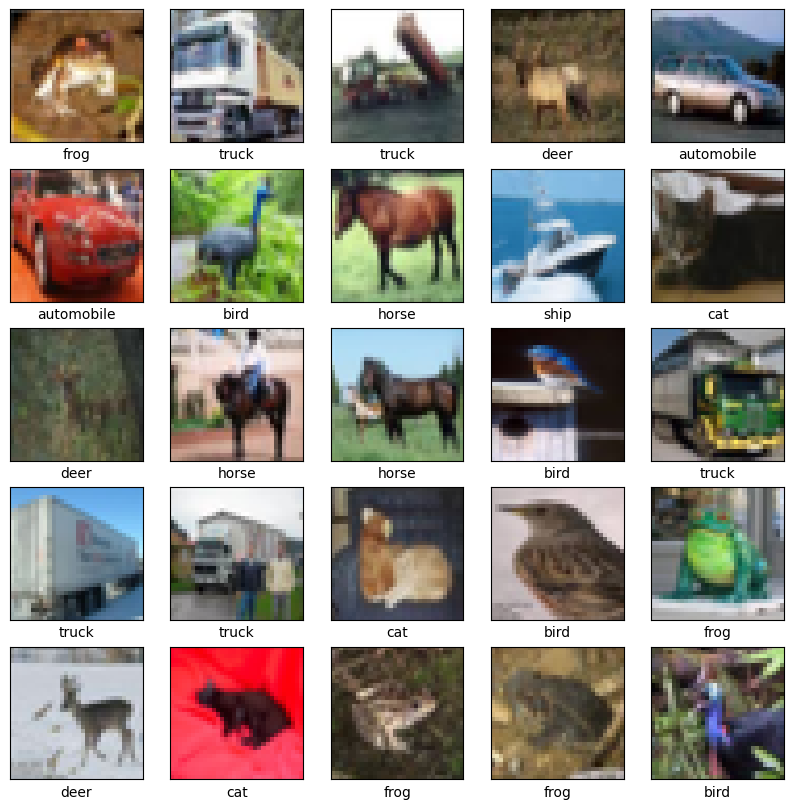

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Langkah 4 - Buat Model CNN

#### Langkah 4.1. - Buat Layer Konvolusi

**Proses:** Kode di bawah ini membangun bagian convolutional block dengan 3 layer konvolusi dan 2 layer pooling.

**Penjelasan Kode:**
- Layer 1: Conv2D dengan 32 filters, kernel 3x3, input shape 32x32x3
- Layer 2: MaxPooling2D dengan pool size 2x2 (mengurangi dimensi menjadi 15x15)
- Layer 3: Conv2D dengan 64 filters, kernel 3x3
- Layer 4: MaxPooling2D dengan pool size 2x2 (mengurangi dimensi menjadi 7x7)
- Layer 5: Conv2D dengan 64 filters, kernel 3x3 (output 5x5x64)

**Analisa Output:** Tidak ada output, convolutional block berhasil dibangun dengan arsitektur bertingkat.

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Langkah 4.2. - Cek Arsitektur Konvolusi

**Proses:** Kode di bawah ini menampilkan ringkasan arsitektur convolutional block yang telah dibuat.

**Penjelasan Kode:**
- `model.summary()` menampilkan detail setiap layer
- Informasi meliputi: nama layer, output shape, dan jumlah parameter

**Analisa Output:** Tabel summary menampilkan 5 layer dengan total parameter dan perubahan dimensi di setiap layer.

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

#### Langkah 4.3. - Tambahkan Layer Fully Connected

**Proses:** Kode di bawah ini menambahkan fully connected layer untuk klasifikasi 10 kelas.

**Penjelasan Kode:**
- `Flatten()` mengubah output 3D (5x5x64) menjadi 1D (1600 neuron)
- `Dense(64, activation='relu')` hidden layer dengan 64 neuron
- `Dense(10)` output layer dengan 10 neuron untuk 10 kelas (tanpa aktivasi karena akan menggunakan from_logits=True)

**Analisa Output:** Tidak ada output, fully connected block berhasil ditambahkan ke model.

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### Langkah 4.4. - Cek Arsitektur Model CNN

**Proses:** Kode di bawah ini menampilkan ringkasan arsitektur lengkap model CNN.

**Penjelasan Kode:**
- Menampilkan arsitektur lengkap dari convolutional block dan fully connected block
- Total 8 layer dengan informasi output shape dan parameter count

**Analisa Output:** Tabel summary lengkap menampilkan semua layer dari input hingga output, total parameter trainable dan non-trainable.

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

#### Langkah 4.5. - Compile Model CNN

**Proses:** Kode di bawah ini melakukan kompilasi model dengan optimizer dan loss function untuk multi-class classification.

**Penjelasan Kode:**
- `optimizer='adam'` menggunakan Adam optimizer
- `loss=SparseCategoricalCrossentropy(from_logits=True)` untuk klasifikasi multi-class dengan label integer
- `from_logits=True` karena output layer tidak menggunakan softmax
- `metrics=['accuracy']` untuk tracking akurasi

**Analisa Output:** Tidak ada output, model berhasil dikompilasi dan siap untuk training.

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Langkah 5 - Fit Model

**Proses:** Kode di bawah ini melatih model CNN dengan dataset CIFAR-10 selama 10 epoch.

**Penjelasan Kode:**
- `model.fit()` memulai proses training
- `train_images, train_labels` sebagai data training
- `epochs=10` melatih model sebanyak 10 iterasi
- `validation_data=(test_images, test_labels)` untuk validasi di setiap epoch
- `history` menyimpan riwayat training untuk visualisasi

**Analisa Output:** Output menampilkan progress per epoch dengan nilai loss, accuracy, val_loss, dan val_accuracy. Monitoring performa model selama training.

In [24]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.3498 - loss: 1.7519 - val_accuracy: 0.5219 - val_loss: 1.3158
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.5660 - loss: 1.2302 - val_accuracy: 0.5871 - val_loss: 1.1501
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.6348 - loss: 1.0408 - val_accuracy: 0.6509 - val_loss: 1.0078
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.6744 - loss: 0.9222 - val_accuracy: 0.6569 - val_loss: 0.9767
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7073 - loss: 0.8372 - val_accuracy: 0.6756 - val_loss: 0.9384
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 49ms/step - accuracy: 0.7285 - loss: 0.7748 - val_accuracy: 0.6826 - val_loss: 0.9203
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7427 - loss: 0.7233 - val_accuracy: 0.6940 - val_loss: 0.9036
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7585 -

### Langkah 6 - Evaluasi Model

**Proses:** Kode di bawah ini memvisualisasikan grafik akurasi training vs validation dan mengevaluasi model pada test set.

**Penjelasan Kode:**
- `plt.plot()` membuat grafik akurasi training dan validation per epoch
- `plt.xlabel()` dan `plt.ylabel()` memberi label sumbu
- `plt.legend()` menampilkan legenda grafik
- `model.evaluate()` menghitung loss dan accuracy pada test set

**Analisa Output:** Grafik menampilkan kurva akurasi training dan validation, membantu mendeteksi overfitting/underfitting. Nilai test accuracy dan test loss ditampilkan.

313/313 - 5s - 17ms/step - accuracy: 0.7183 - loss: 0.8791


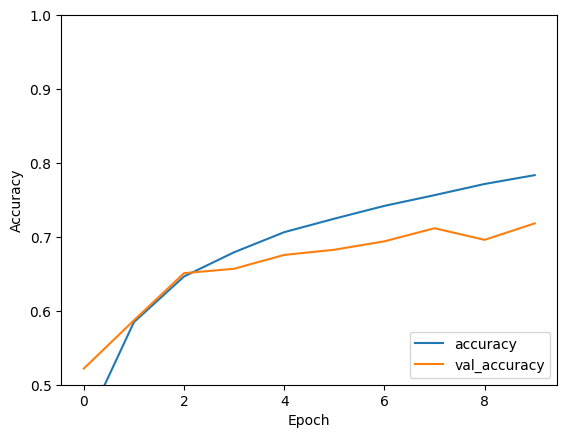

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### Langkah 7 - Cetak Hasil Akurasi

**Proses:** Kode di bawah ini mencetak nilai akurasi final model pada test set.

In [26]:
print(test_acc)

0.7182999849319458


**Penjelasan Kode:**
- `print(test_acc)` menampilkan nilai akurasi akhir pada test set
- Nilai akurasi dalam bentuk desimal (misal: 0.70 = 70%)

**Analisa Output:** Menampilkan satu angka yang merepresentasikan persentase akurasi model dalam memprediksi dataset test (contoh: 0.7012 berarti 70.12% akurat).

## **Tugas Praktikum**

### **Tugas 1 - Modifikasi Model CNN CIFAR-10 untuk Akurasi > 80%**

#### Langkah 1 - Import Library

**Proses:** Kode di bawah ini mengimpor library yang diperlukan untuk membangun model CNN yang lebih kompleks.

In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Penjelasan Kode:**
- Library yang sama dengan Praktikum 2
- TensorFlow untuk deep learning framework
- Keras untuk API high-level
- Matplotlib untuk visualisasi

**Analisa Output:** Library berhasil diimport tanpa error.

#### Langkah 2 - Load dan Preprocessing Dataset

**Proses:** Kode di bawah ini mengunduh dataset CIFAR-10 dan melakukan normalisasi (sama seperti Praktikum 2).

In [28]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

**Penjelasan Kode:**
- Menggunakan dataset CIFAR-10 yang sama
- Normalisasi pixel dari rentang 0-255 ke 0-1
- Dataset terbagi menjadi 50.000 training dan 10.000 testing

**Analisa Output:** Dataset berhasil di-load dan dinormalisasi.

#### Langkah 3 - Bangun Model CNN yang Lebih Dalam

**Proses:** Kode di bawah ini membangun model CNN dengan arsitektur lebih kompleks untuk meningkatkan akurasi di atas 80%.

In [29]:
model_improved = models.Sequential()

# Convolutional Block 1
model_improved.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_improved.add(layers.BatchNormalization())
model_improved.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_improved.add(layers.BatchNormalization())
model_improved.add(layers.MaxPooling2D((2, 2)))
model_improved.add(layers.Dropout(0.2))

# Convolutional Block 2
model_improved.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_improved.add(layers.BatchNormalization())
model_improved.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_improved.add(layers.BatchNormalization())
model_improved.add(layers.MaxPooling2D((2, 2)))
model_improved.add(layers.Dropout(0.3))

# Convolutional Block 3
model_improved.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_improved.add(layers.BatchNormalization())
model_improved.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_improved.add(layers.BatchNormalization())
model_improved.add(layers.MaxPooling2D((2, 2)))
model_improved.add(layers.Dropout(0.4))

# Fully Connected Block
model_improved.add(layers.Flatten())
model_improved.add(layers.Dense(128, activation='relu'))
model_improved.add(layers.BatchNormalization())
model_improved.add(layers.Dropout(0.5))
model_improved.add(layers.Dense(10))

**Penjelasan Kode:**
- **Peningkatan dari Praktikum 2:**
  - Menambah 3 convolutional blocks (dari 2 menjadi 3)
  - Menambahkan `padding='same'` untuk mempertahankan dimensi spatial
  - Menambahkan `BatchNormalization()` setelah setiap Conv2D untuk stabilitas training
  - Menambahkan `Dropout()` untuk mencegah overfitting (0.2, 0.3, 0.4, 0.5)
  - Meningkatkan jumlah filters: 32 → 64 → 128 (lebih banyak feature extraction)
  - Menambahkan 2 Conv2D layer per block untuk pembelajaran lebih dalam

**Analisa Output:** Model yang lebih kompleks berhasil dibuat dengan total parameter yang lebih banyak.

#### Langkah 4 - Cek Arsitektur Model

**Proses:** Kode di bawah ini menampilkan ringkasan arsitektur model yang telah dimodifikasi.

In [30]:
model_improved.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

**Penjelasan Kode:**
- Menampilkan detail setiap layer dalam model
- Total layer: 24 (6 Conv2D, 3 MaxPooling, 6 BatchNorm, 4 Dropout, 1 Flatten, 3 Dense, 1 BatchNorm di FC)

**Analisa Output:** Summary menampilkan arsitektur lengkap dengan output shape dan jumlah parameter di setiap layer.

#### Langkah 5 - Compile Model

**Proses:** Kode di bawah ini melakukan kompilasi model dengan optimizer dan loss function yang sama seperti Praktikum 2.

In [31]:
model_improved.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])

**Penjelasan Kode:**
- Menggunakan Adam optimizer untuk adaptive learning rate
- SparseCategoricalCrossentropy untuk multi-class classification
- Tracking accuracy sebagai metrik evaluasi

**Analisa Output:** Model berhasil dikompilasi dan siap untuk training.

#### Langkah 6 - Training Model

**Proses:** Kode di bawah ini melatih model dengan epoch yang lebih banyak (25 epoch) untuk mencapai akurasi lebih tinggi.

In [32]:
history_improved = model_improved.fit(train_images, train_labels, epochs=25,
                                      validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 496s 313ms/step - accuracy: 0.3518 - loss: 1.9803 - val_accuracy: 0.5391 - val_loss: 1.2795
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 528s 330ms/step - accuracy: 0.6099 - loss: 1.1160 - val_accuracy: 0.6250 - val_loss: 1.0936
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 513s 328ms/step - accuracy: 0.6833 - loss: 0.9073 - val_accuracy: 0.7324 - val_loss: 0.7697
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 511s 327ms/step - accuracy: 0.7271 - loss: 0.7947 - val_accuracy: 0.7108 - val_loss: 0.8240
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 490s 313ms/step - accuracy: 0.7577 - loss: 0.7058 - val_accuracy: 0.7762 - val_loss: 0.6567
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 520s 325ms/step - accuracy: 0.7759 - loss: 0.6566 - val_accuracy: 0.7753 - val_loss: 0.6495
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 492s 315ms/step - accuracy: 0.7904 - loss: 0.6141 - val_accuracy: 0.7700 - val_loss: 0.6866
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 493s 315ms/step - ac

**Penjelasan Kode:**
- Training menggunakan 25 epoch (lebih banyak dari Praktikum 2 yang hanya 10)
- Dengan arsitektur yang lebih dalam dan regularisasi (BatchNorm & Dropout), model dapat belajar lebih baik
- Validasi dilakukan setiap epoch untuk monitoring

**Analisa Output:** Output menampilkan progress training per epoch. Akurasi training dan validation meningkat secara bertahap, dengan target validation accuracy > 80%.

#### Langkah 7 - Evaluasi dan Visualisasi

**Proses:** Kode di bawah ini memvisualisasikan hasil training dan mengevaluasi akurasi final model.

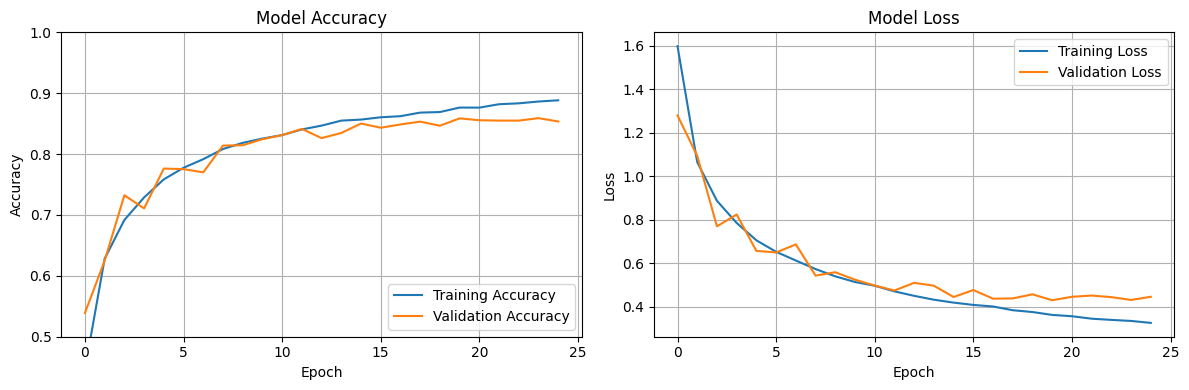

313/313 - 22s - 70ms/step - accuracy: 0.8536 - loss: 0.4457

Test Accuracy: 0.8536 (85.36%)
Test Loss: 0.4457


In [33]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate on test set
test_loss, test_acc = model_improved.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)')
print(f'Test Loss: {test_loss:.4f}')

**Penjelasan Kode:**
- Membuat 2 subplot untuk visualisasi accuracy dan loss
- Plot kiri: kurva accuracy training vs validation
- Plot kanan: kurva loss training vs validation  
- `model.evaluate()` menghitung performa final pada test set
- Print hasil akurasi dan loss dengan format yang jelas

**Analisa Output:**
- Grafik menampilkan perbandingan training dan validation metrics
- Jika model bagus, validation accuracy akan > 80% dan kurva tidak overfitting
- Output print menampilkan test accuracy dalam format desimal dan persentase

---

### **Tugas 2 - Model CNN untuk Klasifikasi Dataset MNIST**

#### Langkah 1 - Import Library dan Load Dataset

**Proses:** Kode di bawah ini mengimpor library yang diperlukan dan mengunduh dataset MNIST dengan preprocessing.

In [34]:
# Import library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load dataset MNIST
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = datasets.mnist.load_data()

# Reshape untuk menambahkan channel dimension (28, 28) -> (28, 28, 1)
train_images_mnist = train_images_mnist.reshape((60000, 28, 28, 1))
test_images_mnist = test_images_mnist.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images_mnist = train_images_mnist / 255.0
test_images_mnist = test_images_mnist / 255.0

print(f'Training set shape: {train_images_mnist.shape}')
print(f'Test set shape: {test_images_mnist.shape}')
print(f'Number of classes: 10 (digits 0-9)')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)
Number of classes: 10 (digits 0-9)


**Penjelasan Kode:**
- Import TensorFlow, Keras, dan Matplotlib (sama seperti Praktikum 2)
- `datasets.mnist.load_data()` mengunduh dataset MNIST (handwritten digits 0-9)
- Dataset berisi 60.000 training images dan 10.000 test images
- Reshape dari (28, 28) menjadi (28, 28, 1) untuk menambahkan channel dimension (grayscale = 1 channel)
- Normalisasi pixel dari 0-255 menjadi 0-1
- Print informasi shape dan jumlah kelas

**Analisa Output:** Output menampilkan shape (60000, 28, 28, 1) untuk training, (10000, 28, 28, 1) untuk testing, dan 10 kelas (digit 0-9).

#### Langkah 2 - Bangun Model CNN untuk MNIST

**Proses:** Kode di bawah ini membangun model CNN dengan arsitektur yang sesuai untuk dataset MNIST (28x28 grayscale images).

In [35]:
model_mnist = models.Sequential()

# Convolutional Block 1
model_mnist.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_mnist.add(layers.MaxPooling2D((2, 2)))

# Convolutional Block 2
model_mnist.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_mnist.add(layers.MaxPooling2D((2, 2)))

# Convolutional Block 3
model_mnist.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully Connected Block
model_mnist.add(layers.Flatten())
model_mnist.add(layers.Dense(64, activation='relu'))
model_mnist.add(layers.Dense(10))

**Penjelasan Kode:**
- **Arsitektur disesuaikan dari Praktikum 2:**
  - Input shape (28, 28, 1) untuk MNIST (berbeda dari CIFAR yang 32x32x3)
  - 3 Convolutional blocks dengan filter 32 → 64 → 64
  - 2 MaxPooling layers untuk down-sampling
  - Flatten layer untuk mengubah 2D ke 1D
  - Dense layer dengan 64 neuron (hidden layer)
  - Output layer dengan 10 neuron untuk 10 digit (0-9)

**Analisa Output:** Model CNN berhasil dibuat dengan arsitektur yang sesuai untuk klasifikasi MNIST.

#### Langkah 3 - Compile Model

**Proses:** Kode di bawah ini melakukan kompilasi model dengan optimizer dan loss function yang sesuai.

In [36]:
model_mnist.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

**Penjelasan Kode:**
- Adam optimizer untuk adaptive learning rate
- SparseCategoricalCrossentropy untuk multi-class classification dengan integer labels
- Accuracy sebagai metrik evaluasi

**Analisa Output:** Model berhasil dikompilasi dan siap untuk training.

#### Langkah 4 - Training Model

**Proses:** Kode di bawah ini melatih model CNN dengan dataset MNIST selama 10 epoch.

In [37]:
history_mnist = model_mnist.fit(train_images_mnist, train_labels_mnist, epochs=10,
                                validation_data=(test_images_mnist, test_labels_mnist))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8918 - loss: 0.3555 - val_accuracy: 0.9753 - val_loss: 0.0715
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9827 - loss: 0.0550 - val_accuracy: 0.9889 - val_loss: 0.0327
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9892 - loss: 0.0334 - val_accuracy: 0.9915 - val_loss: 0.0282
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9933 - loss: 0.0224 - val_accuracy: 0.9915 - val_loss: 0.0291
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9940 - loss: 0.0202 - val_accuracy: 0.9891 - val_loss: 0.0388
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9920 - val_loss: 0.0324
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9956 - loss: 0.0130 - val_accuracy: 0.9909 - val_loss: 0.0317
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9961 -

**Penjelasan Kode:**
- Training dengan 10 epoch pada 60.000 gambar training
- Validasi pada 10.000 gambar test setiap epoch
- MNIST relatif mudah dipelajari, 10 epoch sudah cukup untuk akurasi tinggi

**Analisa Output:** Output menampilkan progress per epoch dengan accuracy dan val_accuracy yang meningkat. MNIST umumnya mencapai >98% accuracy.

#### Langkah 5 - Evaluasi dan Visualisasi

**Proses:** Kode di bawah ini memvisualisasikan hasil training dan mengevaluasi performa model.

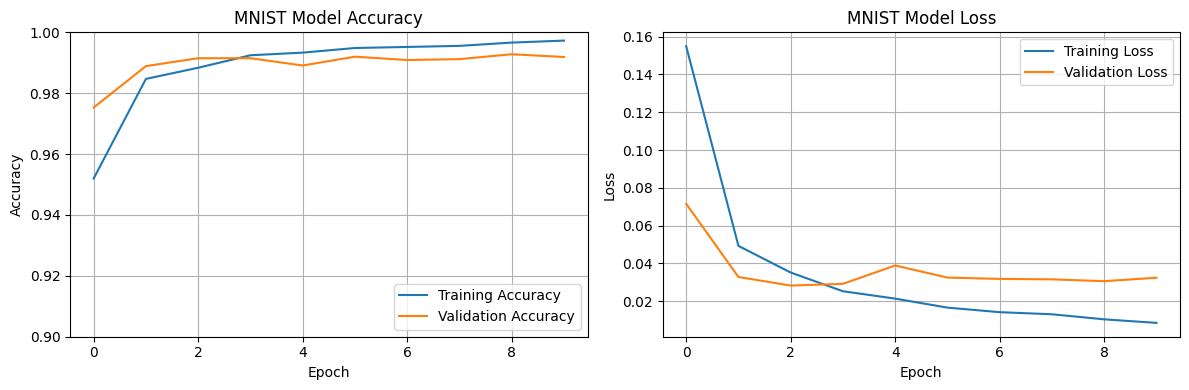

313/313 - 4s - 12ms/step - accuracy: 0.9919 - loss: 0.0324

Test Accuracy: 0.9919 (99.19%)
Test Loss: 0.0324


In [38]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['accuracy'], label='Training Accuracy')
plt.plot(history_mnist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.title('MNIST Model Accuracy')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_mnist.history['loss'], label='Training Loss')
plt.plot(history_mnist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('MNIST Model Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate on test set
test_loss_mnist, test_acc_mnist = model_mnist.evaluate(test_images_mnist, test_labels_mnist, verbose=2)
print(f'\nTest Accuracy: {test_acc_mnist:.4f} ({test_acc_mnist*100:.2f}%)')
print(f'Test Loss: {test_loss_mnist:.4f}')

**Penjelasan Kode:**
- Membuat 2 subplot untuk visualisasi metrics
- Plot accuracy dan loss untuk training vs validation
- Evaluasi final pada test set
- Print hasil dalam format yang mudah dibaca

**Analisa Output:**
- Grafik menunjukkan peningkatan accuracy dan penurunan loss
- Model MNIST biasanya mencapai akurasi >98-99%
- Output menampilkan test accuracy dan loss yang sangat baik

#### Langkah 6 - Prediksi pada Sample Data

**Proses:** Kode di bawah ini melakukan prediksi dan visualisasi pada 15 sample pertama dari test set.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


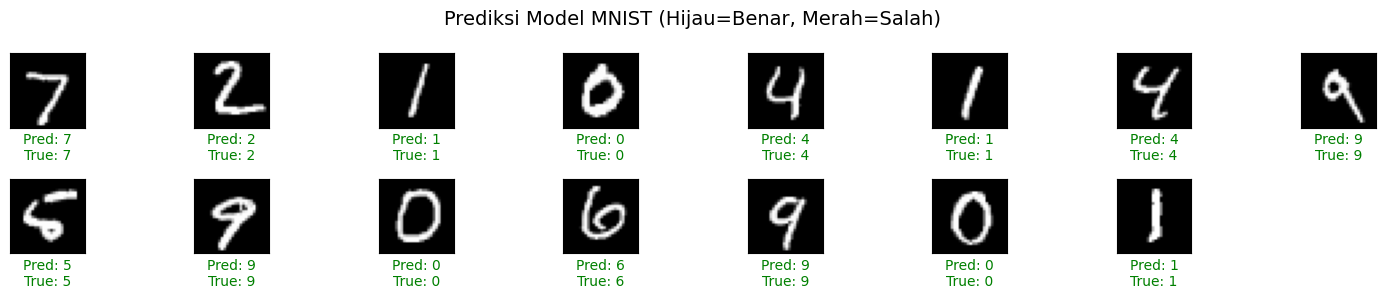

In [39]:
# Prediksi pada 15 sample pertama dari test set
predictions = model_mnist.predict(test_images_mnist[:15])
predicted_labels = tf.nn.softmax(predictions).numpy().argmax(axis=1)

# Visualisasi prediksi
plt.figure(figsize=(15, 3))
for i in range(15):
    plt.subplot(2, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_mnist[i].reshape(28, 28), cmap='gray')

    # Warna hijau jika benar, merah jika salah
    color = 'green' if predicted_labels[i] == test_labels_mnist[i] else 'red'
    plt.xlabel(f'Pred: {predicted_labels[i]}\nTrue: {test_labels_mnist[i]}', color=color)

plt.suptitle('Prediksi Model MNIST (Hijau=Benar, Merah=Salah)', fontsize=14)
plt.tight_layout()
plt.show()

**Penjelasan:**
Kode ini melakukan prediksi pada 15 sample gambar dari test set MNIST, kemudian memvisualisasikan hasilnya dalam grid. Model melakukan prediksi probabilitas untuk setiap kelas (0-9), kemudian kita ambil kelas dengan probabilitas tertinggi sebagai hasil prediksi menggunakan `argmax()`.

**Analisa Output:**
Visualisasi menampilkan 15 gambar digit tulisan tangan dengan label prediksi dan label sebenarnya. Prediksi yang benar ditampilkan dengan warna hijau, sedangkan prediksi yang salah (jika ada) ditampilkan dengan warna merah. Ini membantu kita melihat secara visual performa model pada data nyata dan mengidentifikasi pola kesalahan yang mungkin terjadi.